# Model selection

In this notebook we will select and tune a classifier for our problem.

In [17]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('data/processed_data.csv')

train_columns = ['age',
 'income',
 'member_year',
 'member_month',
 'member_duration_days',
 'gender_F',
 'gender_M',
 'gender_O',
 'informational',
 'discount',
 'duration_hours',
 'difficulty',
 'reward',
 'mobile',
 'web',
 'email',
 'social',
 'missing_data',
 'member_year_2013',
 'member_year_2014',
 'member_year_2015',
 'member_year_2016',
 'member_year_2017',
 'member_year_2018',
 'member_month_1',
 'member_month_2',
 'member_month_3',
 'member_month_4',
 'member_month_5',
 'member_month_6',
 'member_month_7',
 'member_month_8',
 'member_month_9',
 'member_month_10',
 'member_month_11',
 'member_month_12']

X_train, X_test, y_train, y_test = train_test_split(df[train_columns], df.was_completed, random_state=1, test_size=0.2)

### Feature importance

In terms of profile we can see that the amount of time a person has been a member, their income and age are some of the most important characteristics for predicting whether they'll complete the terms of an offer.

For the offer itself, the difficulty and reward size are important indicators, and whether the offer had a social component.

[0.19201333 0.20759267 0.01073851 0.01142788 0.2135353  0.03082821
 0.02903791 0.00468422 0.06727417 0.01863127 0.02808791 0.0319799
 0.02888924 0.0070545  0.01076969 0.         0.04058432 0.
 0.0008718  0.00185926 0.00285411 0.00819639 0.00512349 0.01423578
 0.00261978 0.00274319 0.0026423  0.00296648 0.00293016 0.00370682
 0.00283473 0.00309594 0.00276515 0.00255544 0.00286224 0.00200793]


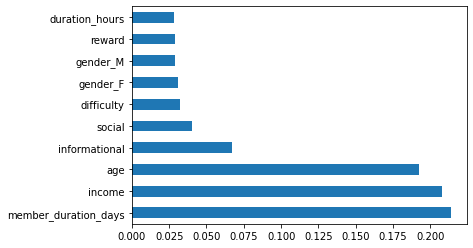

In [47]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Model benchmark

To benchmark the model we can simply predict the dominant class which is that the person did not complete the offer (`was_completed==0`)

In [22]:
y_baseline = np.zeros(y_train.shape)
print('Baseline accuracy: ', 100*accuracy_score(y_train, y_baseline).round(4), '%')

Baseline accuracy:  66.14 %


# Model selection

Random forest classifier performs well at the clasification task. The logistic model performs slightly better than predicting the majority class.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = LogisticRegression(max_iter=500)
cross_validate(clf, X_train, y_train, scoring='accuracy', cv=5)

{'fit_time': array([3.00331998, 1.92637658, 2.04564571, 2.24518466, 0.64273691]),
 'score_time': array([0.00642657, 0.00597   , 0.00566268, 0.00571966, 0.00567985]),
 'test_score': array([0.68865219, 0.68797116, 0.68149787, 0.67600787, 0.66748607])}

In [26]:
clf = RandomForestClassifier()
cross_validate(clf, X_train, y_train, scoring='accuracy', cv=5)

{'fit_time': array([5.40744567, 5.56063724, 5.07025766, 5.08533812, 5.15133452]),
 'score_time': array([0.28566289, 0.30275416, 0.2795217 , 0.27987242, 0.2812438 ]),
 'test_score': array([0.75960672, 0.76032448, 0.7589315 , 0.75491642, 0.7491806 ])}

# Modeling tuning

By tuning the model we can achieve XX%. This score entirely vvalidates the robustness of our approach, since it significantly beats our benchmark score of XX%.

In [32]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_estimators': [25, 50, 100, 150, 200, 250],
    'max_depth': [1, 3, 5, 7, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

clf = GridSearchCV(
    RandomForestClassifier(), 
    grid_params, 
    'accuracy'
)

clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [37]:
print('Best params: ', clf.best_params_)
# {'max_depth': 10, 'max_features': None, 'n_estimators': 250}

stds = clf.cv_results_['std_test_score']
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))

Best params:  {'max_depth': 10, 'max_features': None, 'n_estimators': 250}
0.661 (+/-0.000) for {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 25}
0.661 (+/-0.000) for {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 50}
0.661 (+/-0.000) for {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 100}
0.661 (+/-0.000) for {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 150}
0.661 (+/-0.000) for {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 200}
0.661 (+/-0.000) for {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 250}
0.661 (+/-0.000) for {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 25}
0.661 (+/-0.000) for {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 50}
0.661 (+/-0.000) for {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 100}
0.661 (+/-0.000) for {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 150}
0.661 (+/-0.000) for {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 200}
0.661 (+/-0.000)

### Evaluate performance on test dataset

Below we can see that our model has not overfit to the training data and we can see comparable accuracy on the test data.

In [41]:
y_pred = clf.predict(X_test)
print('Test accuracy: ', 100*accuracy_score(y_test, y_pred).round(4), '%')

Test accuracy:  77.39 %


### Conclusion

Our main objective was to predict which users will respond to a given offer. We have outperformed our benchmark score of 66% by +11% with a tuned random forest model. Enabling us to predict offer completion with 77.39% accuracy.

Across two notebooks we have:
- Transformed and combined datasets to derive a target label for classification
- Engineered features for learning
- Derived a baseline model to benchmark our predictions
- Selected a model suited to the problem (RandomForet)
- Tuned the model using both grid search and cross validation
- Evaluated the model against the test dataset

As part of the process we have learnt that features X,Y,Z were the most important. A tangible recommendation from this work is to use social media more often as a channel for communication with customers. 

##### Next steps 

To further improve the model additional features could be derived and explored, for example we could enrich our existin model with features regarding a person's transaction history (taking care to avoid data leakage).

Whilst we selected a decision tree over a logistic model a logistic model shouldn't be ruled out. Logistic regression is easy to interpret and very quick to train, one of the reasons a decision tree may outperform a logistic model is due to how decisions trees can effectively create "bins" in the data with branching logic or deal with categories. This means there may be some features (like categories and bins) we can learn fron the random forest model and implement with a logistic model. 